DSTC 870 - Project 

Selina Narain, Neelam Boywah, Zoya Haq

In [18]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")

In [19]:
#Load the dataset
df = pd.read_csv('/Users/selinanarain/Desktop/MalwareDetection/feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df = pd.read_csv('C:\Fall2023\DTSC870/feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df = pd.read_csv('/Users/zoya/Desktop/Malware Detection/feature_vectors_syscallsbinders_frequency_5_Cat.csv')

In [20]:
#Display first 5 lines of dataset
df.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


In [21]:
# Check for missing values in dataset
print(df.isnull().sum())

ACCESS_PERSONAL_INFO___    0
ALTER_PHONE_STATE___       0
ANTI_DEBUG_____            0
CREATE_FOLDER_____         0
CREATE_PROCESS`_____       0
                          ..
watchRotation              0
windowGainedFocus          0
write                      0
writev                     0
Class                      0
Length: 471, dtype: int64


In [22]:
# Drop any duplicates and display the size of dataset
df = df.drop_duplicates()
df.shape

(11526, 471)

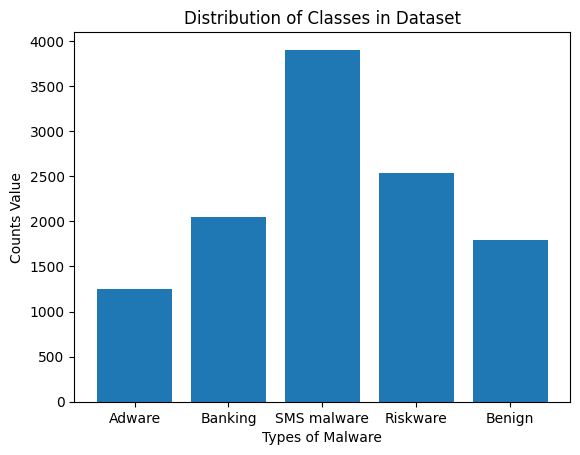

In [23]:
# Display the malware distribution in the dataste
label_counts = df['Class'].value_counts()
labels = label_counts.index.tolist()
counts = label_counts.tolist()

# Define the bar graph with data, axis and title
plt.bar(labels, counts)
plt.xlabel('Types of Malware')
plt.ylabel('Counts Value')
plt.title('Distribution of Classes in Dataset')

#Create custom names for x ticks using the classes
classes_labels = ['SMS malware', 'Riskware', 'Banking', 'Benign', 'Adware']
plt.xticks(labels, classes_labels)

#Display the plot
plt.show()

# Reference: (1) Adware: 1,253, (2) Banking: 2,100, (3) SMS malware: 3,904, (4) Riskware: 2,546, (5) Benign: 1,795

470 extracted features for 11,598 APK files comprising frequencies of system calls, binders, and composite behaviors
139 extracted features for 11,598 APK files comprising frequencies of system calls
50,621 extracted features for 11,598 APK files comprising static information, such as intent actions, permissions, intent consts, permissions, files, method tags, sensitive APIs, services, packages, receivers, etc.

In [24]:
# Iterate and display a list of the df columns
for col in df.columns:
    print(col)

ACCESS_PERSONAL_INFO___
ALTER_PHONE_STATE___
ANTI_DEBUG_____
CREATE_FOLDER_____
CREATE_PROCESS`_____
CREATE_THREAD_____
DEVICE_ACCESS_____
EXECUTE_____
FS_ACCESS____
FS_ACCESS()____
FS_ACCESS(CREATE)____
FS_ACCESS(CREATE__APPEND)__
FS_ACCESS(CREATE__READ)__
FS_ACCESS(CREATE__READ__WRITE)
FS_ACCESS(CREATE__WRITE)__
FS_ACCESS(CREATE__WRITE__APPEND)
FS_ACCESS(READ)____
FS_ACCESS(READ__WRITE)__
FS_ACCESS(WRITE)____
FS_PIPE_ACCESS___
FS_PIPE_ACCESS()___
FS_PIPE_ACCESS(READ)___
FS_PIPE_ACCESS(READ__)_
FS_PIPE_ACCESS(READ__WRITE)_
FS_PIPE_ACCESS(WRITE)___
NETWORK_ACCESS____
NETWORK_ACCESS()____
NETWORK_ACCESS(READ)____
NETWORK_ACCESS(READ__WRITE)__
NETWORK_ACCESS(READ__WRITE__)
NETWORK_ACCESS(WRITE)____
NETWORK_ACCESS(WRITE__)__
SMS_SEND____
TERMINATE_PROCESS
TERMINATE_THREAD
__arm_nr_cacheflush
__arm_nr_set_tls
_llseek
_newselect
accept
access
add
addAccessibilityInteractionConnection
addAccountExplicitly
addClient
addPeriodicSync
addStatusChangeListener
addToDisplay
addToDisplayWithoutInput

In [25]:
#Features
X = df.drop(columns=['Class'])
#Target
y = df['Class']

#Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

#ANOVA-based feature selection
selected_features = 120  
k_best_features = SelectKBest(score_func = f_classif, k = selected_features)
X_train_selected_features = k_best_features.fit_transform(X_train, y_train)
X_test_selected_features = k_best_features.transform(X_test)

#Indicies of selected features
selected_features_idx = k_best_features.get_support(indices=True)

#Converting selected features to a DataFrame
X_train = X_train.iloc[:, selected_features_idx]
X_test = X_test.iloc[:, selected_features_idx]
X_train.head()

,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,FS_ACCESS(CREATE)____,FS_ACCESS(CREATE__READ)__,FS_ACCESS(CREATE__READ__WRITE),FS_ACCESS(CREATE__WRITE)__,...,socket,socketpair,startInput,stat64,statfs64,sysinfo,ugetrlimit,uname,unlink,vfork
9652,2,0,10,0,14,0,2,0,0,2,...,1,0,1,17,0,0,0,1,0,0
11116,12,2,26,5,44,2,8,0,0,11,...,7,0,0,78,1,0,2,1,2,0
8165,0,0,9,0,6,1,1,1,0,3,...,1,0,0,22,0,0,0,1,1,0
6913,6,0,40,0,42,6,5,0,2,12,...,19,12,0,72,0,0,3,1,8,0
6682,7,0,45,0,52,2,14,0,7,9,...,34,12,0,102,0,0,3,1,6,0


In [26]:
# Display shape of X_test
X_test.shape

(2306, 120)

In [27]:
# Scale the data using Standard Scaler function from SKLearn
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Naive Bayes Model

Naive Bayes Classifier Accuracy: 0.5889
Naive Bayes Classifier Precision: 0.6804
Naive Bayes Classifier Recall: 0.5889
Naive Bayes Classifier F1-Score: 0.5486
Classification Report: 
               precision    recall  f1-score   support

           1       0.31      0.58      0.40       251
           2       0.68      0.13      0.22       409
           3       0.59      0.98      0.74       781
           4       0.87      0.31      0.46       507
           5       0.87      0.65      0.74       358

    accuracy                           0.59      2306
   macro avg       0.66      0.53      0.51      2306
weighted avg       0.68      0.59      0.55      2306

Confusion Matrix:  
 [[145   1 100   3   2]
 [ 73  53 262  10  11]
 [  8   4 769   0   0]
 [174  18 134 159  22]
 [ 74   2  40  10 232]]


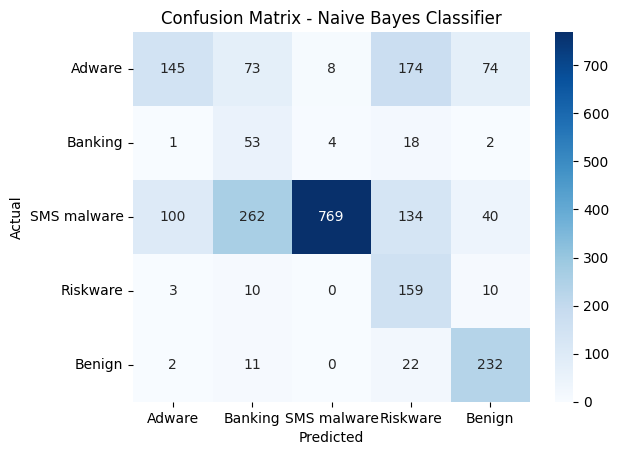

In [28]:
#Create Naive Bayes Model 
naive_bayes_model = GaussianNB()

#Fit X_train and y_train into the model
naive_bayes_model.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_nb = naive_bayes_model.predict(X_test)

#Calculate the metrics for the Naive Bayes Classifier
naive_bayes_accuracy = accuracy_score(y_test, y_pred_nb)
naive_bayes_precision = precision_score(y_test, y_pred_nb,average='weighted')
naive_bayes_recall = recall_score(y_test, y_pred_nb,average='weighted')
naive_bayes_f1 = f1_score(y_test, y_pred_nb,average='weighted')

#Display the metrics for the Naive Bayes Classifier
print("Naive Bayes Classifier Accuracy: %.4f" % (naive_bayes_accuracy))
print("Naive Bayes Classifier Precision: %.4f" % (naive_bayes_precision))
print("Naive Bayes Classifier Recall: %.4f" % (naive_bayes_recall))
print("Naive Bayes Classifier F1-Score: %.4f" % (naive_bayes_f1))
print("Classification Report: " "\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_nb))

#Create and display heat map
conf_matrix = confusion_matrix(y_pred_nb, y_test)
sns.heatmap(conf_matrix , cmap='Blues', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

Random Forest Model

Random Forest Classifier Accuracy:  0.9480
Random Forest Classifier Precision: 0.9484
Random Forest Classifier Recall: 0.9480
Random Forest Classifier F1-Score: 0.9479
Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.93      0.90       251
           2       0.97      0.92      0.94       409
           3       0.97      0.99      0.98       781
           4       0.95      0.92      0.93       507
           5       0.93      0.93      0.93       358

    accuracy                           0.95      2306
   macro avg       0.94      0.94      0.94      2306
weighted avg       0.95      0.95      0.95      2306

Confusion Matrix:  
 [[233   2   4   8   4]
 [  6 377   6  10  10]
 [  0   3 775   1   2]
 [ 22   2   4 468  11]
 [  4   5   8   8 333]]


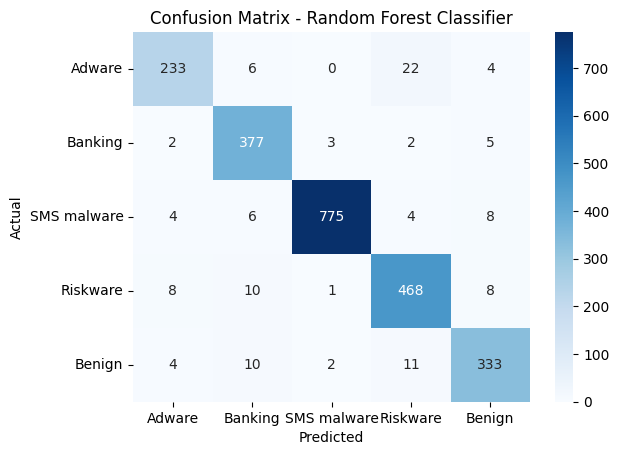

In [29]:
#Create Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=300, random_state=42)

#Fit and train classifier on the training data
random_forest_model.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_rf = random_forest_model.predict(X_test)

#Calculate the metrics for the Random Forest Classifier
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)
random_forest_precision = precision_score(y_test, y_pred_rf,average='weighted')
random_forest_recall = recall_score(y_test, y_pred_rf,average='weighted')
random_forest_f1 = f1_score(y_test, y_pred_rf,average='weighted')

#Display the metrics for the Random Forest Classifier
print("Random Forest Classifier Accuracy:  %.4f" % (random_forest_accuracy))
print("Random Forest Classifier Precision: %.4f" % (random_forest_precision))
print("Random Forest Classifier Recall: %.4f" % (random_forest_recall))
print("Random Forest Classifier F1-Score: %.4f" % (random_forest_f1))
print("Classification Report: " "\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_rf))

#Create and display heatmap
conf_matrix = confusion_matrix(y_pred_rf, y_test)
sns.heatmap(conf_matrix , cmap='Blues', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], 
            yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


Metrics on Original Model:
Original Accuracy: 0.9480
Precision: 0.9484
Recall: 0.9480
F1-Score: 0.9479

Metrics on Adversarial Predictions:
Accuracy on Adversarial Examples: 0.3079
Precision: 0.2411
Recall: 0.3079
F1-Score: 0.2188


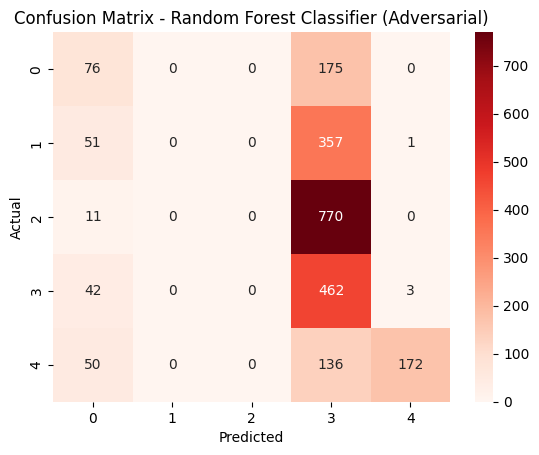

In [30]:
# Function to generate adversarial examples using feature importances
def fgsm_attack(X, importance, epsilon=0.1):
    perturbation = epsilon * importance
    X_adv = X + perturbation
    X_adv = np.clip(X_adv, 0, 1)
    return X_adv

# Calculate feature importances
importance = random_forest_model.feature_importances_

# Generate adversarial examples using FGSM attack
X_test_adv = fgsm_attack(X_test, importance, epsilon=0.1)

# Evaluate the model on adversarial examples
y_pred_rf_adv = random_forest_model.predict(X_test_adv)

# Calculate metrics on original predictions
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)
precision_original = precision_score(y_test, y_pred_rf, average='weighted')
recall_original = recall_score(y_test, y_pred_rf, average='weighted')
f1_original = f1_score(y_test, y_pred_rf, average='weighted')

# Calculate metrics on adversarial predictions
accuracy_adv = accuracy_score(y_test, y_pred_rf_adv)
precision_adv = precision_score(y_test, y_pred_rf_adv, average='weighted')
recall_adv = recall_score(y_test, y_pred_rf_adv, average='weighted')
f1_adv = f1_score(y_test, y_pred_rf_adv, average='weighted')

# Print metrics for original predictions
print("\nMetrics on Original Model:")
print("Original Accuracy: %.4f" % (random_forest_accuracy))
print(f"Precision: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")

# Print metrics for adversarial predictions
print("\nMetrics on Adversarial Predictions:")
print(f"Accuracy on Adversarial Examples: {accuracy_adv:.4f}")
print(f"Precision: {precision_adv:.4f}")
print(f"Recall: {recall_adv:.4f}")
print(f"F1-Score: {f1_adv:.4f}")

# Display the confusion matrix for the Random Forest Classifier on adversarial examples
conf_matrix_adv = confusion_matrix(y_test, y_pred_rf_adv)
sns.heatmap(conf_matrix_adv, cmap='Reds', fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier (Adversarial)')
plt.show()


Metrics on Adversarial Predictions after Adversarial Training:
Accuracy on Adversarial Examples: 0.8938
Precision: 0.8965
Recall: 0.8938
F1-Score: 0.8934


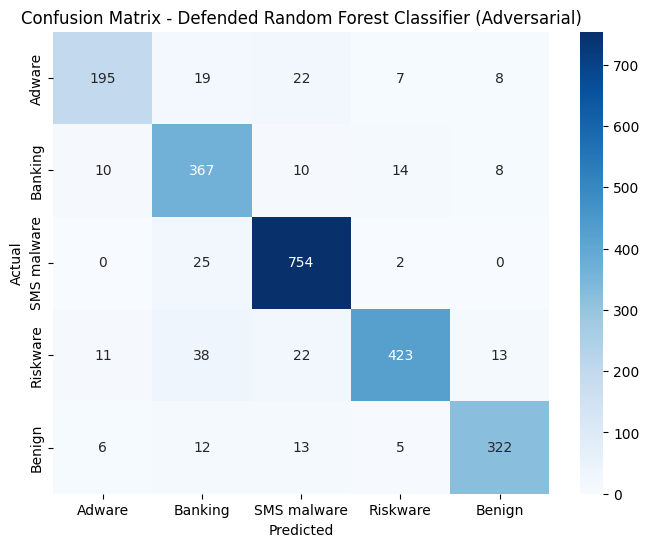

In [31]:
# Function to perform adversarial training
def adversarial_training(model, X_train, y_train, epsilon=0.1, n_iterations=10):
    for _ in range(n_iterations):
        # Train on clean data
        model.fit(X_train, y_train)
        
        # Calculate feature importances
        importance = model.feature_importances_
        
        # Generate adversarial examples using FGSM attack
        X_train_adv = fgsm_attack(X_train, importance, epsilon)
        
        # Combine clean and adversarial examples
        X_train_combined = np.vstack([X_train, X_train_adv])
        y_train_combined = np.hstack([y_train, y_train])
        
        # Shuffle the data
        indexes = np.arange(len(X_train_combined))
        np.random.shuffle(indexes)
        X_train_combined_shuffled = X_train_combined[indexes]
        y_train_combined_shuffled = y_train_combined[indexes]
        
        # Retrain the model on the combined dataset
        model.fit(X_train_combined_shuffled, y_train_combined_shuffled)
    
    return model

# Adversarial training on the Random Forest model
adversarial_random_forest_model = adversarial_training(random_forest_model, X_train, y_train, epsilon=0.1)

# Evaluate the defended model on adversarial examples
y_pred_rf_adv = adversarial_random_forest_model.predict(X_test_adv)

# Calculate metrics on adversarial predictions
accuracy_adv_defense = accuracy_score(y_test, y_pred_rf_adv)
precision_adv_defense = precision_score(y_test, y_pred_rf_adv, average='weighted')
recall_adv_defense = recall_score(y_test, y_pred_rf_adv, average='weighted')
f1_adv_defense = f1_score(y_test, y_pred_rf_adv, average='weighted')

# Print metrics for adversarial predictions
print("\nMetrics on Adversarial Predictions after Adversarial Training:")
print(f"Accuracy on Adversarial Examples: {accuracy_adv_defense:.4f}")
print(f"Precision: {precision_adv_defense:.4f}")
print(f"Recall: {recall_adv_defense:.4f}")
print(f"F1-Score: {f1_adv_defense:.4f}")

# Display the confusion matrix for adversarial predictions
conf_matrix_adv = confusion_matrix(y_test, y_pred_rf_adv)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adv, cmap='Blues', fmt='', xticklabels=['Adware', 'Banking', 'SMS malware', 'Riskware', 'Benign'], yticklabels=['Adware', 'Banking', 'SMS malware', 'Riskware', 'Benign'], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Defended Random Forest Classifier (Adversarial)')
plt.show()

In [32]:
#Classifiers and corresponding colors
models_attack_defense_vis = ['Original Model', 'FGSM Attack', 'Defense']

#Metric Variables
attack_defense_accuracy_scores = [random_forest_accuracy, accuracy_adv, accuracy_adv_defense]
attack_defense_precision_scores = [random_forest_precision, precision_adv, precision_adv_defense]
attack_defense_recall_scores = [random_forest_recall, recall_adv, recall_adv_defense]
attack_defense_f1_scores = [random_forest_f1, f1_adv, f1_adv_defense]

#Define metrics variable to define the 4 metrics calculated
attack_defense_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

#Data for each of the metrics
attack_defense_data = [attack_defense_accuracy_scores, attack_defense_precision_scores, attack_defense_recall_scores, attack_defense_f1_scores]

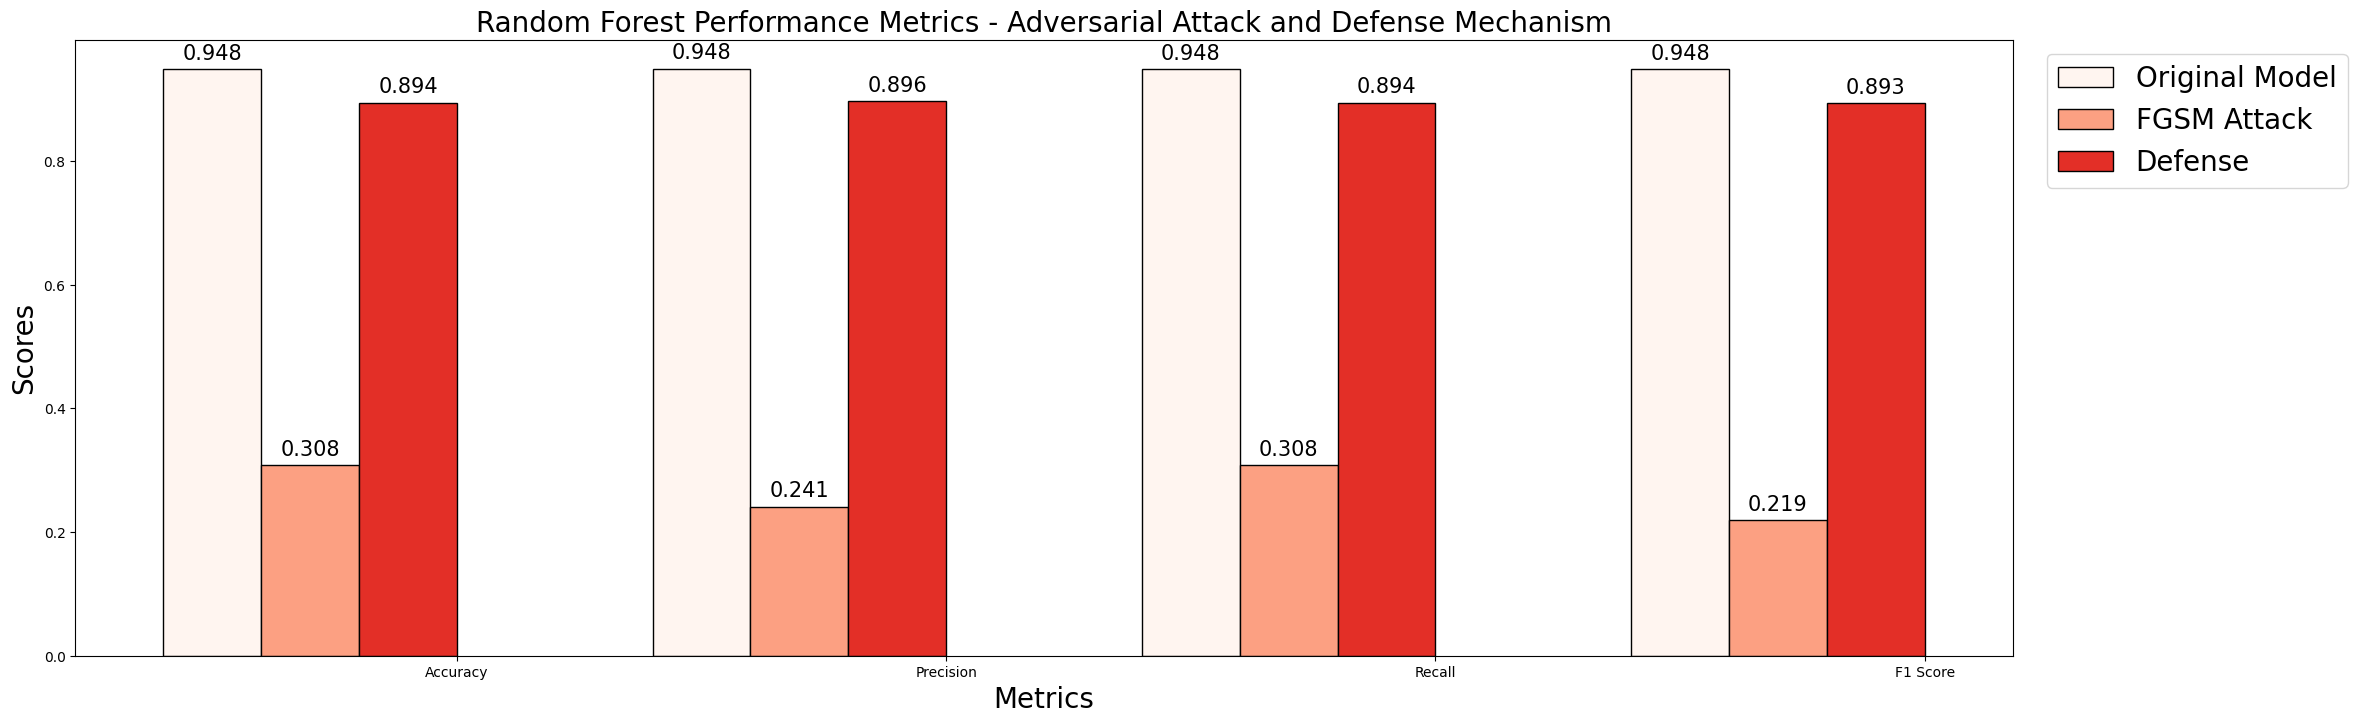

In [33]:
from matplotlib.cm import Reds

fig, ax = plt.subplots(figsize=(25, 8))

x = np.arange(len(attack_defense_data))

# Width of each bar
width = 0.2

# Create a range of blue colors using the 'Blues' colormap
color_map = Reds
colors = [color_map(i / len(models_attack_defense_vis)) for i in range(len(models_attack_defense_vis))]

# Classifier and plot bars with a range of blue colors
for i, advmodels in enumerate(models_attack_defense_vis):
    bars = ax.bar(x + i * width, [d[i] for d in attack_defense_data], width, label=advmodels, color=colors[i], edgecolor='black')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize = '15')

# Labels, Graph title, and Legend on the left
ax.set_xlabel('Metrics', fontsize = '20')
ax.set_ylabel('Scores', fontsize = '20')
ax.set_title('Random Forest Performance Metrics - Adversarial Attack and Defense Mechanism', fontsize = '20')
ax.set_xticks(x + 2.5 * width)
ax.set_xticklabels(attack_defense_metrics)
ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1), ncol=1, fontsize = '20')

# Display the plot
plt.show()

Logistic Regression Model

Logistic Regression Accuracy: 0.8053
Logistic Regression Precision: 0.8072
Logistic Regression Recall: 0.8053
Logistic Regression F1-Score: 0.8007
Classification Report: 
               precision    recall  f1-score   support

           1       0.74      0.57      0.64       251
           2       0.72      0.75      0.74       409
           3       0.81      0.97      0.88       781
           4       0.85      0.71      0.77       507
           5       0.90      0.80      0.85       358

    accuracy                           0.81      2306
   macro avg       0.80      0.76      0.78      2306
weighted avg       0.81      0.81      0.80      2306

Confusion Matrix:  
 [[143  48  33  23   4]
 [ 19 308  59  15   8]
 [  1  16 757   7   0]
 [ 19  40  66 361  21]
 [ 11  14  25  20 288]]


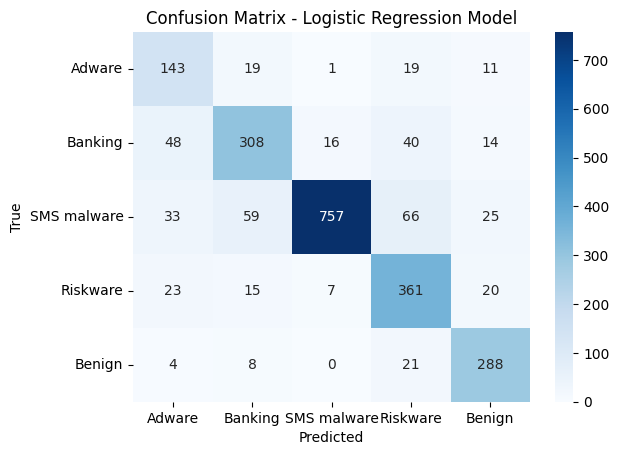

In [34]:
#Create Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

#Fit and train classifier on the training data
log_reg_model.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_log_reg = log_reg_model.predict(X_test)

#Calculate the metrics for the Logistic Regression Classifier
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg,average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg,average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg,average='weighted')

#Display the metrics for the Logistic Regression Classifier
print("Logistic Regression Accuracy: %.4f" % (log_reg_accuracy))
print("Logistic Regression Precision: %.4f" % (log_reg_precision))
print("Logistic Regression Recall: %.4f" % (log_reg_recall))
print("Logistic Regression F1-Score: %.4f" % (log_reg_f1))
print("Classification Report: " "\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_log_reg))

#Create and display heatmap
conf_matrix = confusion_matrix(y_pred_log_reg, y_test)
sns.heatmap(conf_matrix , cmap='Blues', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

K-Nearest Neighbors Model

Best K value: 3
K-Nearest Neighbors Classifier Accuracy: 0.9055
K-Nearest Neighbors Classifier Precision: 0.9092
K-Nearest Neighbors Classifier Recall: 0.9055
K-Nearest Neighbors Classifier F1-Score: 0.9053
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.87      0.79       251
           2       0.90      0.89      0.90       409
           3       0.96      0.99      0.98       781
           4       0.93      0.92      0.92       507
           5       0.91      0.75      0.82       358

    accuracy                           0.91      2306
   macro avg       0.88      0.88      0.88      2306
weighted avg       0.91      0.91      0.91      2306

Confusion Matrix:  
 [[219   7   6   8  11]
 [ 24 366   9   6   4]
 [  0   7 771   2   1]
 [ 20   7   4 465  11]
 [ 40  21  10  20 267]]


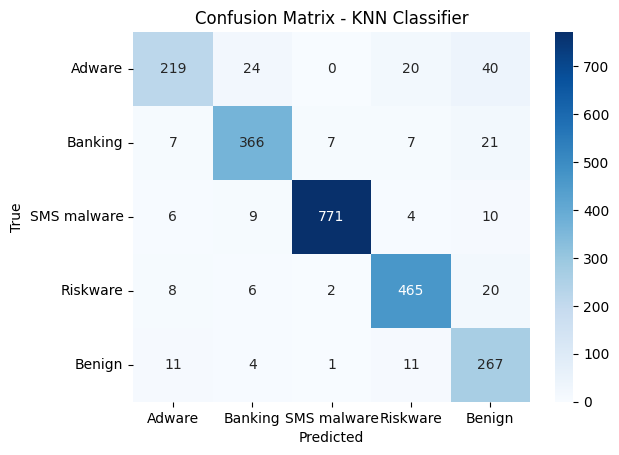

In [35]:
#Range of K values 
K_values = [2, 3, 4, 5, 7, 9, 10, 11]

K_best = None
accuracy_best = 0

#Create KNN Model using K_values for the value of n_neighbors
for k in K_values:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    #perform cross-validation to evaluate the KNN model
    scores = cross_val_score(KNN_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    if mean_accuracy > accuracy_best:
        accuracy_best = mean_accuracy
        K_best = k

#Training the KNN model with the best k value
model_KNN_best = KNeighborsClassifier(n_neighbors = K_best)
model_KNN_best.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_KNN = model_KNN_best.predict(X_test)

#Calculate the metrics for the KNN Classifier
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
KNN_precision = precision_score(y_test, y_pred_KNN, average='weighted')
KNN_recall = recall_score(y_test, y_pred_KNN, average='weighted')
KNN_f1 = f1_score(y_test, y_pred_KNN, average='weighted')

#Display the metrics for the KNN Classifier
print("Best K value:", K_best)
print("K-Nearest Neighbors Classifier Accuracy: %.4f" % (KNN_accuracy))
print("K-Nearest Neighbors Classifier Precision: %.4f" % (KNN_precision))
print("K-Nearest Neighbors Classifier Recall: %.4f" % (KNN_recall))
print("K-Nearest Neighbors Classifier F1-Score: %.4f" % (KNN_f1))
print("Classification Report: " "\n", classification_report(y_test,y_pred_KNN))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_KNN))

#Create and display heatmap
conf_matrix = confusion_matrix(y_pred_KNN, y_test)
sns.heatmap(conf_matrix, cmap='Blues', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)  
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Model (Kernel - 'rbf')

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -965.074952, rho = 0.244479
nSV = 1235, nBSV = 1086
*
optimization finished, #iter = 641
obj = -607.913569, rho = -0.809814
nSV = 800, nBSV = 749
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -931.486400, rho = 0.604848
nSV = 1258, nBSV = 1043
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -718.188288, rho = 0.759201
nSV = 1077, nBSV = 799
*
optimization finished, #iter = 958
obj = -978.298163, rho = -1.580181
nSV = 1275, nBSV = 1234
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1331.919994, rho = 0.486648
nSV = 1705, nBSV = 1551
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -699.801567, rho = 0.685318
nSV = 1067, nBSV = 782
*
optimization finished, #iter = 816
obj = -824.012604, rho = 1.577362
nSV = 1070, nBSV = 1032
*
optimization finished, #iter = 586
obj = -476.35921

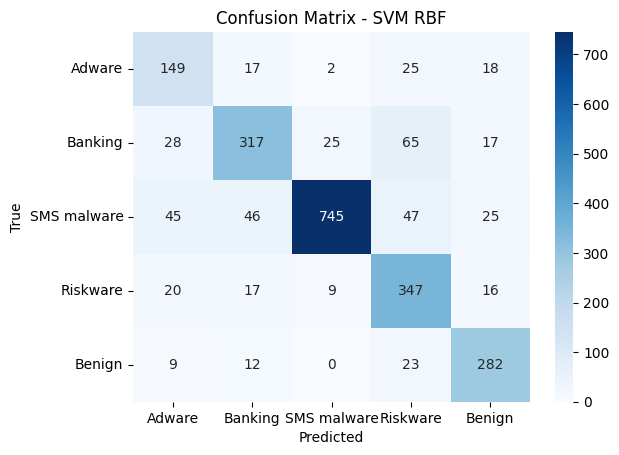

In [36]:
#Create SVM Model
svm_classifier_rbf = SVC(kernel='rbf', C=1.0, random_state=42, verbose=5, max_iter=1000, gamma = 'auto')

#Fit and train classifier on the training data
svm_classifier_rbf.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_svm_rbf = svm_classifier_rbf.predict(X_test)

#Calculate the metrics for the SVM Classifier
svm_accuracy_rbf = accuracy_score(y_test, y_pred_svm_rbf)
svm_precision_rbf = precision_score(y_test, y_pred_svm_rbf,average='weighted')
svm_recall_rbf = recall_score(y_test, y_pred_svm_rbf,average='weighted')
svm_f1_rbf = f1_score(y_test, y_pred_svm_rbf,average='weighted')

#Display the metrics for the SVM Classifier
print("SVM RBF Classifier Accuracy: %.4f" % (svm_accuracy_rbf))
print("SVM RBF Classifier Precision: %.4f" % (svm_precision_rbf))
print("SVM RBF Classifier Recall: %.4f" % (svm_recall_rbf))
print("SVM RBF Classifier F1-Score: %.4f" % (svm_f1_rbf))
print("Classification Report: " "\n", classification_report(y_test, y_pred_svm_rbf))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_svm_rbf))

#Create and display heat map
conf_matrix = confusion_matrix (y_pred_svm_rbf, y_test)
sns.heatmap(conf_matrix , cmap='Blues', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)
plt.title('Confusion Matrix - SVM RBF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Model (Kernel - 'linear')

[LibSVM].....................................*...............*.......................................................*
optimization finished, #iter = 107174
obj = -806.454526, rho = 0.220602
nSV = 900, nBSV = 821
....
*..*
optimization finished, #iter = 6471
obj = -273.540054, rho = -4.035677
nSV = 347, nBSV = 295
...........................................*....................*...............................................*................................................*
optimization finished, #iter = 157157
obj = -828.910184, rho = 1.930685
nSV = 926, nBSV = 842
...........................*...........*
optimization finished, #iter = 38619
obj = -400.617105, rho = -0.919912
nSV = 504, nBSV = 423
..................
*.....
*......*
optimization finished, #iter = 29379
obj = -660.132316, rho = -4.206457
nSV = 775, nBSV = 717
...............................................
*..................*...............................................................*...............................

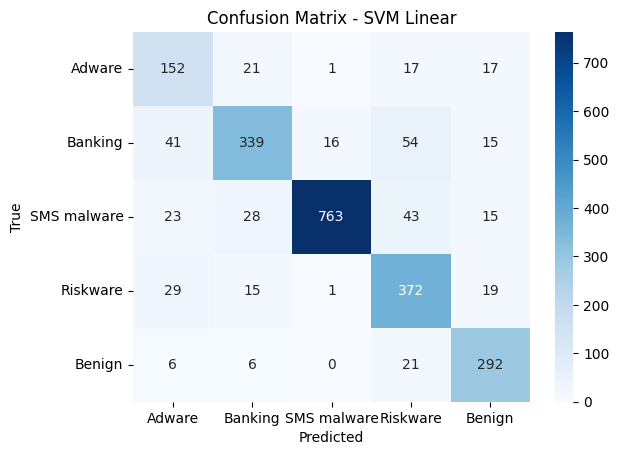

In [37]:
#Create an SVM classifier
svm_classifier_linear = SVC(kernel='linear', C=1.0, random_state=42, verbose = 5, max_iter=1000000, gamma = 'scale')

#Fit and train classifier on the training data
svm_classifier_linear.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_svm_linear = svm_classifier_linear.predict(X_test)

#Calculate the metrics for the SVM Classifier
svm_accuracy_linear = accuracy_score(y_test, y_pred_svm_linear)
svm_precision_linear = precision_score(y_test, y_pred_svm_linear,average='weighted')
svm_recall_linear = recall_score(y_test, y_pred_svm_linear,average='weighted')
svm_f1_linear = f1_score(y_test, y_pred_svm_linear,average='weighted')

#Display the metrics for the SVM Classifier
print("SVM Linear Classifier Accuracy: %.4f" % (svm_accuracy_linear))
print("SVM Linear Classifier Precision: %.4f" % (svm_precision_linear))
print("SVM Linear Classifier Recall: %.4f" % (svm_recall_linear))
print("SVM Linear Classifier F1-Score: %.4f" % (svm_f1_linear))
print("Classification Report: " "\n", classification_report(y_test, y_pred_svm_linear))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_svm_linear))

#Create and display heat map
conf_matrix = confusion_matrix(y_pred_svm_linear, y_test)
sns.heatmap(conf_matrix , cmap='Blues', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)
plt.title('Confusion Matrix - SVM Linear')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Deep Learning - Dense Neural Network Model

In [38]:
#Read New Brunswick dataset
#dataframe = pd.read_csv('C:\Fall2023\DTSC870/feature_vectors_syscallsbinders_frequency_5_Cat.csv')
dataframe = pd.read_csv('/Users/selinanarain/Desktop/MalwareDetection/feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#dataframe = pd.read_csv('/Users/zoya/Desktop/Malware Detection/feature_vectors_syscallsbinders_frequency_5_Cat.csv')

In [39]:
#Display the class values
print(dataframe['Class'].unique())

[1 2 3 4 5]


In [40]:
# Iterate and display a list of the df columns
for col in df.columns:
    print(col)

ACCESS_PERSONAL_INFO___
ALTER_PHONE_STATE___
ANTI_DEBUG_____
CREATE_FOLDER_____
CREATE_PROCESS`_____
CREATE_THREAD_____
DEVICE_ACCESS_____
EXECUTE_____
FS_ACCESS____
FS_ACCESS()____
FS_ACCESS(CREATE)____
FS_ACCESS(CREATE__APPEND)__
FS_ACCESS(CREATE__READ)__
FS_ACCESS(CREATE__READ__WRITE)
FS_ACCESS(CREATE__WRITE)__
FS_ACCESS(CREATE__WRITE__APPEND)
FS_ACCESS(READ)____
FS_ACCESS(READ__WRITE)__
FS_ACCESS(WRITE)____
FS_PIPE_ACCESS___
FS_PIPE_ACCESS()___
FS_PIPE_ACCESS(READ)___
FS_PIPE_ACCESS(READ__)_
FS_PIPE_ACCESS(READ__WRITE)_
FS_PIPE_ACCESS(WRITE)___
NETWORK_ACCESS____
NETWORK_ACCESS()____
NETWORK_ACCESS(READ)____
NETWORK_ACCESS(READ__WRITE)__
NETWORK_ACCESS(READ__WRITE__)
NETWORK_ACCESS(WRITE)____
NETWORK_ACCESS(WRITE__)__
SMS_SEND____
TERMINATE_PROCESS
TERMINATE_THREAD
__arm_nr_cacheflush
__arm_nr_set_tls
_llseek
_newselect
accept
access
add
addAccessibilityInteractionConnection
addAccountExplicitly
addClient
addPeriodicSync
addStatusChangeListener
addToDisplay
addToDisplayWithoutInput

In [41]:
#Display the shape of the dataframe
dataframe.shape

(11598, 471)

In [42]:
#Define the features and target
#For X, use all features except 'Class'

#Features
X = dataframe.drop(columns=['Class'])
#Target
y = dataframe['Class']

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
#Standardize the features using Standard Scaler from sklearn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
#Updating y_train and y_test
y_train_update = y_train - 1
y_test_update = y_test - 1

In [45]:
#Display the shape
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((9278, 470), (9278,)), ((2320, 470), (2320,)))

In [46]:
#Building the Dense Neural Network model architecture
model = keras.Sequential([
    #1st Dense layer takes the size of the amount of features in the dataframe and utilizes 'relu' activation function
    layers.Dense(470, activation='relu', input_shape=(X_train.shape[1],)),
    #Regularize to prevent overfitting
    layers.Dropout(0.5),
    #2nd Dense layer takes the size of half of the amount of features inthe data frame and utilizes 'relu' function
    layers.Dense(235, activation='relu'),
    #3rd Dense layer takes in the number of class values and utilizs the 'softmax' activation function
    layers.Dense(5, activation='softmax')
])

In [47]:
#Display a summary of the DNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 470)               221370    
                                                                 
 dropout (Dropout)           (None, 470)               0         
                                                                 
 dense_1 (Dense)             (None, 235)               110685    
                                                                 
 dense_2 (Dense)             (None, 5)                 1180      
                                                                 
Total params: 333235 (1.27 MB)
Trainable params: 333235 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
#Compiling the DNN model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [49]:
#Fit and Training the DNN model
model.fit(X_train_scaled, y_train_update, epochs = 10, batch_size = 128, validation_split = 0.2)

#Evaluating the DNN model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis = 1)

Epoch 1/10
58/58 [==============================] - 1s 4ms/step - loss: 0.9634 - accuracy: 0.6671 - val_loss: 0.6872 - val_accuracy: 0.7942
Epoch 2/10
58/58 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.7945 - val_loss: 0.5913 - val_accuracy: 0.8120
Epoch 3/10
58/58 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.8251 - val_loss: 0.5490 - val_accuracy: 0.8513
Epoch 4/10
58/58 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.8496 - val_loss: 0.5394 - val_accuracy: 0.8502
Epoch 5/10
58/58 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8630 - val_loss: 0.5182 - val_accuracy: 0.8648
Epoch 6/10
58/58 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8725 - val_loss: 0.4966 - val_accuracy: 0.8798
Epoch 7/10
58/58 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.8808 - val_loss: 0.4508 - val_accuracy: 0.8777
Epoch 8/10
58/58 [==

Accuracy: 0.8625
DNN Precision: 0.8629
DNN Recall: 0.8625
DNN F1-Score: 0.8602
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       262
           1       0.79      0.84      0.81       424
           2       0.89      0.98      0.94       786
           3       0.90      0.80      0.84       500
           4       0.85      0.83      0.84       348

    accuracy                           0.86      2320
   macro avg       0.85      0.83      0.84      2320
weighted avg       0.86      0.86      0.86      2320

Confusion Matrix:  
 [[181  26  22  12  21]
 [ 15 357  27  13  12]
 [  0   9 774   2   1]
 [ 11  49  23 399  18]
 [  6  13  20  19 290]]


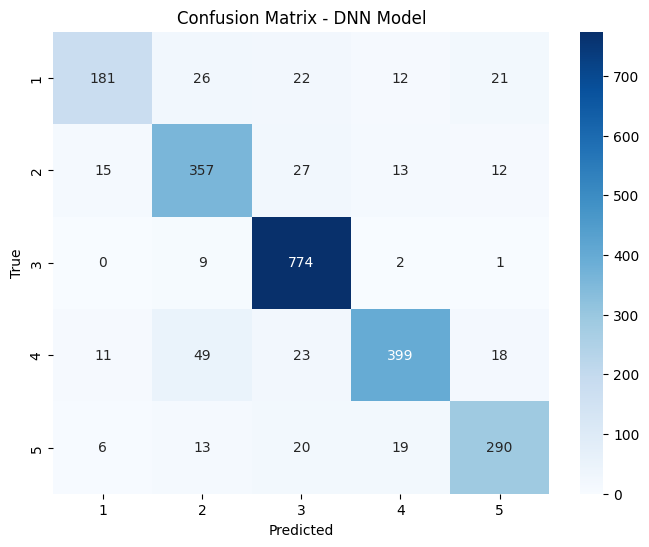

In [50]:
#Dense Neural Network metrics Calculation
dnn_accuracy = accuracy_score(y_test_update, y_pred_labels)
dnn_precision = precision_score(y_test_update, y_pred_labels, average='weighted')
dnn_recall = recall_score(y_test_update, y_pred_labels, average='weighted')
dnn_f1 = f1_score(y_test_update, y_pred_labels, average='weighted')

#Display DNN metrics
print("Accuracy: %.4f" % (dnn_accuracy))
print("DNN Precision: %.4f" % dnn_precision)
print("DNN Recall: %.4f" % dnn_recall)
print("DNN F1-Score: %.4f" % dnn_f1)
print("Classification Report: " "\n", classification_report(y_test_update, y_pred_labels))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test_update, y_pred_labels))

#Define classes and their values
classes = [1,2,3,4,5]

#Create and display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_update, y_pred_labels), annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.title('Confusion Matrix - DNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Comparison of Models

In [51]:
#Classifiers and corresponding colors
classifiers = ['Logistic Regression', 'KNN', 'Random Forest', 'Naive Bayes', 'SVM RBF', 'SVM Linear', 'DNN Model']

#Metric Variables
accuracy_scores = [naive_bayes_accuracy, random_forest_accuracy, log_reg_accuracy, KNN_accuracy, svm_accuracy_rbf, svm_accuracy_linear,dnn_accuracy]
precision_scores = [naive_bayes_precision, random_forest_precision, log_reg_precision, KNN_precision, svm_precision_rbf, svm_precision_linear, dnn_precision]
recall_scores = [naive_bayes_recall, random_forest_recall, log_reg_recall, KNN_recall, svm_recall_rbf, svm_recall_linear, dnn_recall]
f1_scores = [naive_bayes_f1, random_forest_f1, log_reg_f1, KNN_f1, svm_f1_rbf, svm_f1_linear, dnn_f1]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

#Data for each of the metrics
data = [accuracy_scores, precision_scores, recall_scores, f1_scores]

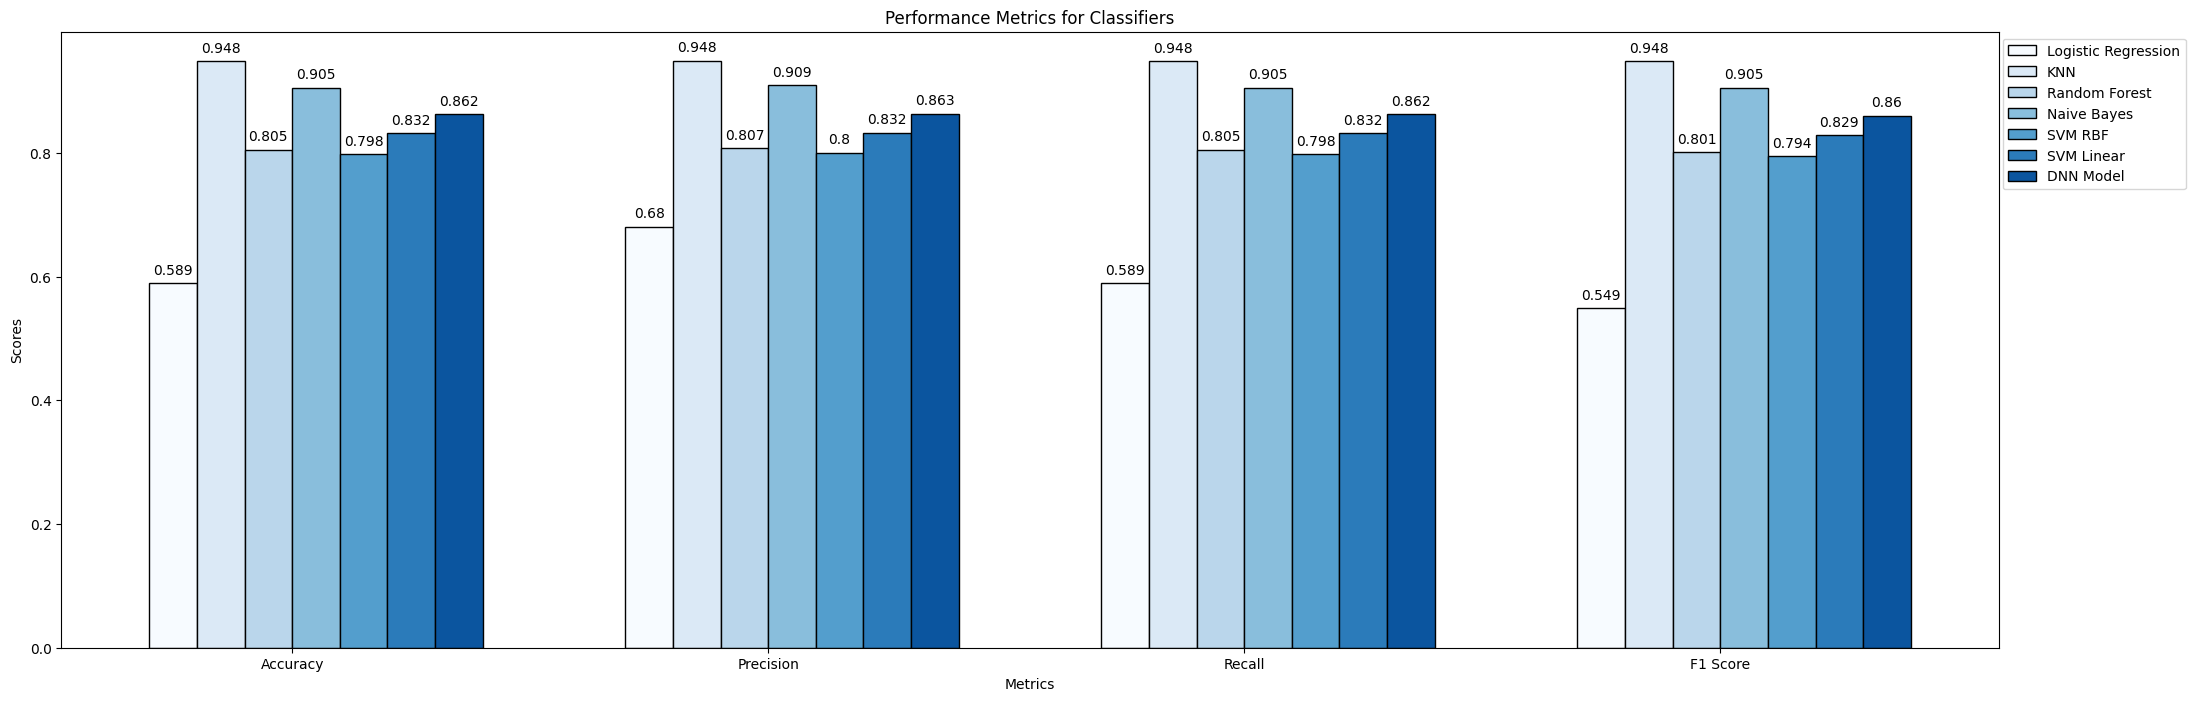

In [52]:
from matplotlib.cm import Blues

fig, ax = plt.subplots(figsize=(25, 8))

x = np.arange(len(metrics))

# Width of each bar
width = 0.1

# Create a range of blue colors using the 'Blues' colormap
color_map = Blues
colors = [color_map(i / len(classifiers)) for i in range(len(classifiers))]

# Classifier and plot bars with a range of blue colors
for i, classifier in enumerate(classifiers):
    bars = ax.bar(x + i * width, [d[i] for d in data], width, label=classifier, color=colors[i], edgecolor='black')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# Labels, Graph title, and Legend on the left
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Classifiers')
ax.set_xticks(x + 2.5 * width)
ax.set_xticklabels(metrics)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1), ncol=1)

# Display the plot
plt.show()